In [116]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [117]:
# Reading the data from the csv file
df = pd.read_csv('Country_data.csv')

In [118]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [120]:
df.shape

(167, 10)

In [121]:
f = df.columns[1:]

In [122]:
f

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [123]:
list(enumerate(f))

[(0, 'child_mort'),
 (1, 'exports'),
 (2, 'health'),
 (3, 'imports'),
 (4, 'income'),
 (5, 'inflation'),
 (6, 'life_expec'),
 (7, 'total_fer'),
 (8, 'gdpp')]

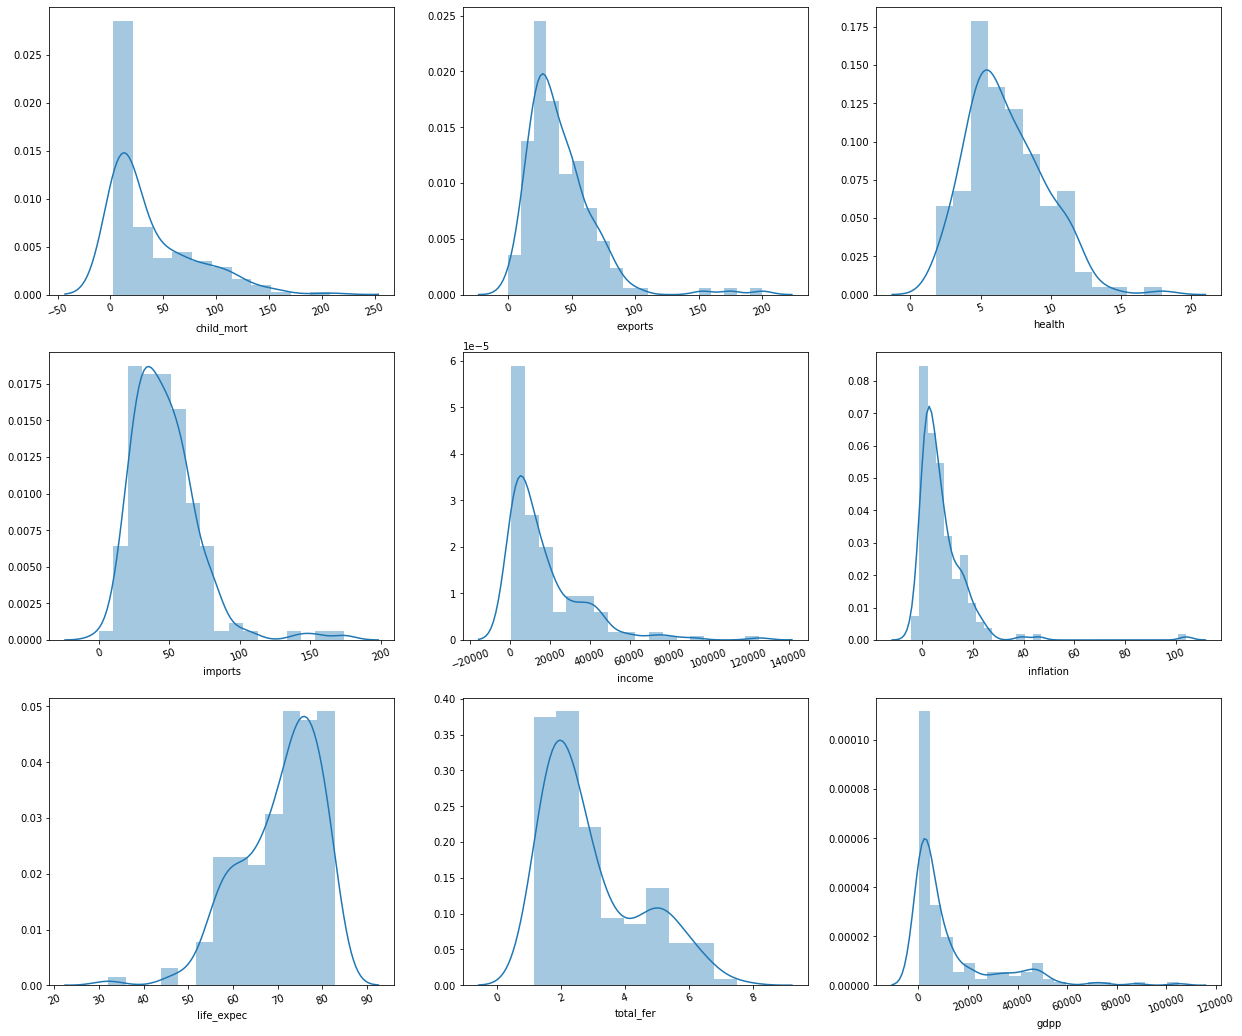

In [124]:
#Doing EDA to understand the spread of the data
plt.figure(figsize = (21,18))
for i in enumerate(f):
    ax=plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])
    plt.xticks(rotation = 20)

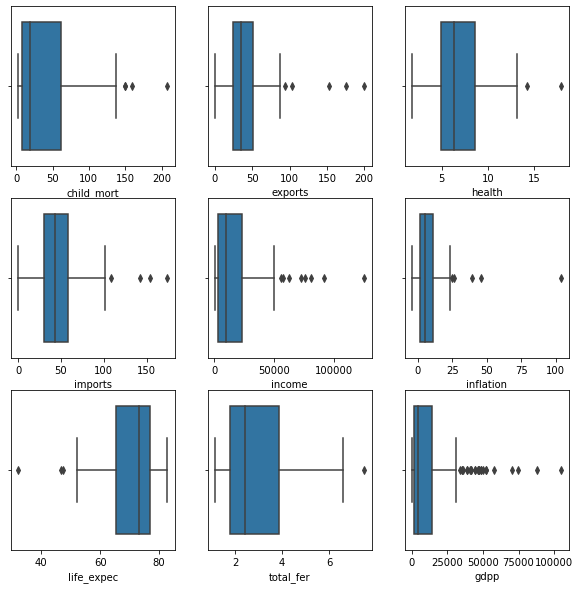

In [125]:
#BoxPlot to analyze the outliers
plt.figure(figsize = (10,10))
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1],data = df)

In [126]:
#We are using soft capping as a method to deal with outliers

#Softcapping the upperhalf for columns import,health,income,gdpp

#Soft Capping for health

q1 = df['health'].quantile(0.00)
q4 = df['health'].quantile(0.99)

df['health'][df['health']<=q1] = q1
df['health'][df['health']>=q4] = q4

#Soft Capping for income

q1 = df['income'].quantile(0.00)
q4 = df['income'].quantile(0.99)

df['income'][df['income']<=q1] = q1
df['income'][df['income']>=q4] = q4

#Soft Capping for gdpp

q1 = df['gdpp'].quantile(0.00)
q4 = df['gdpp'].quantile(0.99)

df['gdpp'][df['gdpp']<=q1] = q1
df['gdpp'][df['gdpp']>=q4] = q4

#Soft capping exports
q1 = df['exports'].quantile(0.00)
q4 = df['exports'].quantile(0.99)

df['exports'][df['exports']<=q1] = q1
df['exports'][df['exports']>=q4] = q4

#Soft capping imports
q1 = df['imports'].quantile(0.00)
q4 = df['imports'].quantile(0.99)

df['imports'][df['imports']<=q1] = q1
df['imports'][df['imports']>=q4] = q4

<ipython-input-126-ea18a98ca8e3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['health'][df['health']<=q1] = q1
<ipython-input-126-ea18a98ca8e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['health'][df['health']>=q4] = q4
<ipython-input-126-ea18a98ca8e3>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'][df['income']<=q1] = q1
<ipython-input-126-ea18a98ca8e3>:26: SettingWithCopyWarning: 
A value is trying to

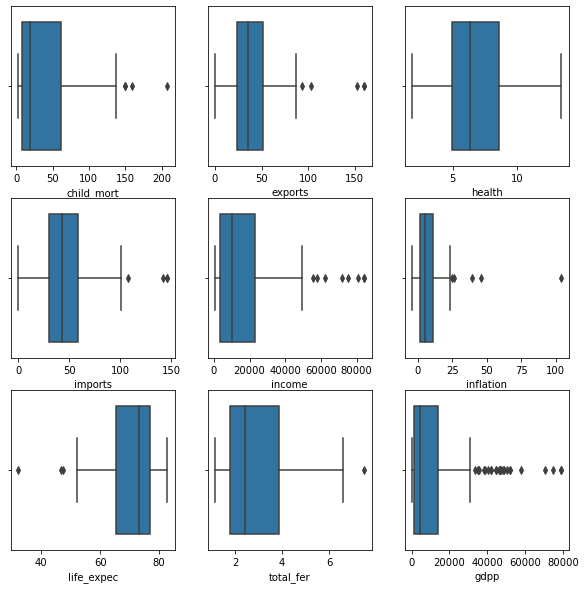

In [127]:
#Checking the treated outliers

plt.figure(figsize = (10,10))
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1],data = df)

In [128]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,40.785383,6.784838,46.675604,16857.550898,7.781832,70.555689,2.947964,12756.826347
std,40.328931,25.747110,2.647580,23.198129,17957.012855,10.570704,8.893172,1.513848,17430.208938
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,160.480000,13.474000,146.080000,84374.000000,104.000000,82.800000,7.490000,79088.000000


In [129]:
#Hopkins statistic for cluster tendency
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [130]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


In [131]:
hopkins(df.drop("country",axis = 1))

0.9156817516749539

In [132]:
#Scaling the data after outlier treatment
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1 = ss.fit_transform(df.drop("country",axis = 1))

In [133]:
df1 = pd.DataFrame(df1)
df1.columns = df.columns[:-1]
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-1.199279,0.301239,-0.076771,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.498069,-0.088966,0.083204,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.092925,-0.990604,-0.660465,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,0.838126,-1.490672,-0.163244,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,0.183663,-0.285963,0.528541,0.125254,-0.601749,0.704258,-0.541946,-0.032042


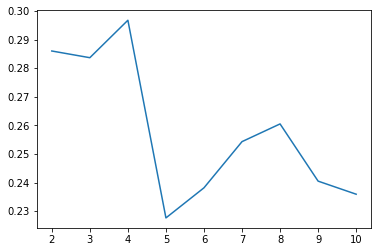

In [134]:
#Using Silhouette score to find optimal K Values or the number of clusters
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k,silhouette_score(df1,kmeans.labels_)])
    
sil = pd.DataFrame(ss)
plt.plot(sil[0],sil[1])

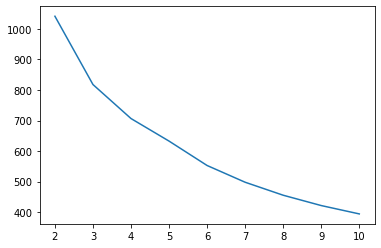

In [135]:
#SSD elbow curve

ssd = []

for k in range (2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k,kmean.inertia_])
    
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0],ssd[1])

In [136]:
#Final KMeans with k==3
kmean = KMeans(n_clusters = 3,random_state = 0)
kmean.fit(df1)

KMeans(n_clusters=3, random_state=0)

In [137]:
kmean.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [138]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


In [139]:
#Assigning the cluster labels
df['cluster_id'] = kmean.labels_

In [140]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1


In [141]:
#checking how many data points we have in each cluster 
df.cluster_id.value_counts()

1    84
0    47
2    36
Name: cluster_id, dtype: int64

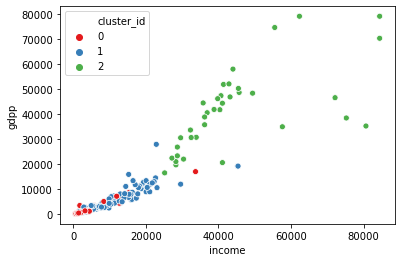

In [142]:
#plotting
sns.scatterplot(x = 'income',y='gdpp',hue = 'cluster_id',data = df,palette = 'Set1')

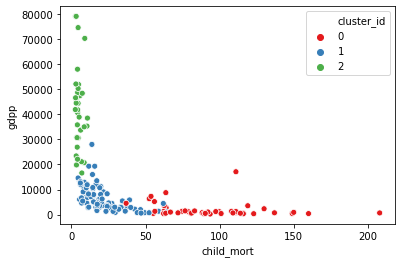

In [143]:
sns.scatterplot(x = 'child_mort',y='gdpp',hue = 'cluster_id',data = df,palette = 'Set1')

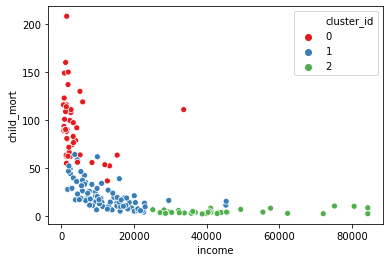

In [144]:
sns.scatterplot(x = 'income',y='child_mort',hue = 'cluster_id',data = df,palette = 'Set1')

In [145]:
#cluster profiling
df[['income','child_mort','gdpp','cluster_id']].groupby('cluster_id').mean()

,income,child_mort,gdpp
cluster_id,,,
0,3942.404255,92.961702,1922.382979
1,12305.595238,21.927381,6486.452381
2,44340.222222,5.000000,41532.666667


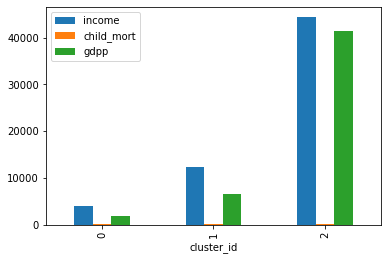

In [146]:
df[['income','child_mort','gdpp','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

In [162]:
c1 = df[df['cluster_id']==0]
c1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.440,56.2,5.82,553.0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0,0,0
17,Benin,111.0,23.8,4.10,37.2,1820.0,0.885,61.8,5.36,758.0,0,0
21,Botswana,52.5,43.6,8.30,51.3,13300.0,8.920,57.1,2.88,6350.0,0,0
25,Burkina Faso,116.0,19.2,6.74,29.6,1430.0,6.810,57.9,5.87,575.0,0,0


In [163]:
#Sorting the countries based 
c1.sort_values(by = ['income','child_mort','gdpp'],ascending = [True,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609.0,20.80,57.5,6.54,334.0,0,0
88,Liberia,89.3,19.10,11.80,92.6,700.0,5.47,60.8,5.02,327.0,0,0
26,Burundi,93.6,8.92,11.60,39.2,764.0,12.30,57.7,6.26,231.0,0,0
112,Niger,123.0,22.20,5.16,49.1,814.0,2.55,58.8,7.49,348.0,0,0
31,Central African Republic,149.0,11.80,3.98,26.5,888.0,2.01,47.5,5.21,446.0,0,0
106,Mozambique,101.0,31.50,5.21,46.2,918.0,7.64,54.5,5.56,419.0,0,0
94,Malawi,90.5,22.80,6.59,34.9,1030.0,12.10,53.1,5.31,459.0,0,0
63,Guinea,109.0,30.30,4.93,43.2,1190.0,16.10,58.0,5.34,648.0,0,0
150,Togo,90.3,40.20,7.65,57.3,1210.0,1.18,58.7,4.87,488.0,0,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220.0,17.20,55.0,5.20,399.0,0,0


In [149]:
#Hierarchial Clustering
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-1.199279,0.301239,-0.076771,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.498069,-0.088966,0.083204,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.092925,-0.990604,-0.660465,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,0.838126,-1.490672,-0.163244,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,0.183663,-0.285963,0.528541,0.125254,-0.601749,0.704258,-0.541946,-0.032042


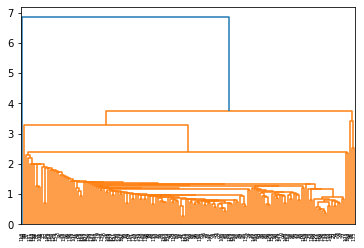

In [150]:
#Single Linkage
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

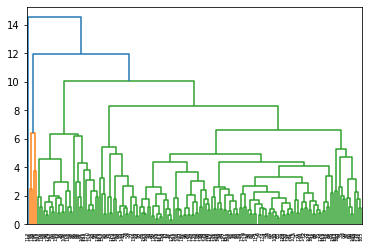

In [151]:
#Complete linkage
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [165]:
cluster_labels = cut_tree(mergings, n_clusters=6).reshape(-1, )
cluster_labels

array([0, 1, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1,
       1, 3, 1, 0, 0, 1, 0, 3, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1,
       3, 1, 1, 1, 1, 2, 0, 1, 1, 3, 3, 1, 0, 1, 3, 1, 1, 1, 1, 2, 0, 1,
       0, 1, 3, 1, 1, 1, 2, 3, 1, 1, 1, 3, 1, 1, 0, 0, 3, 1, 1, 1, 1, 0,
       0, 1, 1, 4, 1, 0, 2, 1, 1, 0, 4, 2, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1,
       3, 1, 0, 5, 3, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 0, 1, 4,
       0, 4, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 3, 3, 1, 0, 1, 2, 0, 1, 1, 1,
       1, 0, 1, 3, 1, 3, 1, 1, 1, 2, 1, 2, 2])

In [168]:
df['cluster_labels'] = cluster_labels

In [169]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1,1


In [170]:
df['cluster_labels'].value_counts()

1    97
0    31
3    20
2    14
4     4
5     1
Name: cluster_labels, dtype: int64

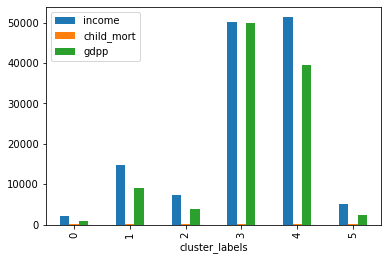

In [171]:
#Plots
df[['income','child_mort','gdpp','cluster_labels']].groupby('cluster_labels').mean().plot(kind = 'bar')

In [172]:
c2 = df[df['cluster_labels']==2]
c2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.4,60.1,6.16,3530.0,0,2
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609.0,20.8,57.5,6.54,334.0,0,2
38,"Congo, Rep.",63.9,85.1,2.46,54.7,5190.0,20.7,60.4,4.95,2740.0,0,2
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700.0,24.9,60.9,5.21,17100.0,0,2
63,Guinea,109.0,30.3,4.93,43.2,1190.0,16.1,58.0,5.34,648.0,0,2


In [173]:
c2.sort_values(by = ['income','child_mort','gdpp'],ascending = [True,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609.0,20.8,57.5,6.54,334.0,0,2
94,Malawi,90.5,22.8,6.59,34.9,1030.0,12.1,53.1,5.31,459.0,0,2
63,Guinea,109.0,30.3,4.93,43.2,1190.0,16.1,58.0,5.34,648.0,0,2
149,Timor-Leste,62.6,2.2,9.12,27.8,1850.0,26.5,71.1,6.23,3600.0,0,2
166,Zambia,83.1,37.0,5.89,30.9,3280.0,14.0,52.0,5.40,1460.0,0,2
99,Mauritania,97.4,50.7,4.41,61.2,3320.0,18.9,68.2,4.98,1200.0,0,2
142,Sudan,76.7,19.7,6.32,17.2,3370.0,19.6,66.3,4.88,1480.0,0,2
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.6,67.5,4.67,1310.0,0,2
38,"Congo, Rep.",63.9,85.1,2.46,54.7,5190.0,20.7,60.4,4.95,2740.0,0,2
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.4,60.1,6.16,3530.0,0,2
